In [5]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd

import matplotlib.pyplot as pl

In [3]:
df = pd.read_csv("data/SimulatedSales.csv.zip")
df.fillna(-1, inplace=True)
df.sort_values(['Store','index'], inplace=True)
df.set_index('index', inplace=True)
df.index.name = None

n_stores = df.Store.nunique()

print(df.shape)
df.head()

(362463, 9)


,Sales,Store,DayOfWeek,Month,WeekOfYear,Promo,Promo2,LocalHoliday,SchoolHoliday
0,4266,85,3,1,1,0,0,0,1
1,3478,85,4,1,1,0,0,0,0
2,4469,85,5,1,1,0,0,0,0
3,1603,85,6,1,1,0,0,0,0
4,6991,85,1,1,2,1,0,0,0


In [4]:
X = df["Sales"].values

split = int(0.66*len(X))
train, test = X[0:split], X[split:]

(250000, 300000)

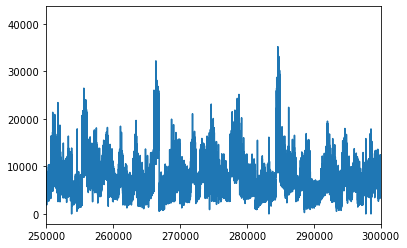

In [8]:
pl.plot(X)
pl.xlim(250000,300000)

In [ ]:
history = [x for x in train]
predictions = []
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
    
	obs = test[t]
	history.append(obs)
mse = mean_squared_error(test, predictions)

print(f"MSE error: {mse}")